In [15]:
import pandas as pd
from pathlib import Path

In [16]:
ruta_base = Path.cwd()
ruta_base = ruta_base.parents[1]

In [17]:
ruta_bd = ruta_base / 'Ejercicio2' / 'data' / 'raw' / 'bd.xlsx'
clientes_raw = pd.read_excel(ruta_bd, sheet_name='CLIENTES')

In [18]:
clientes_raw.head()

,NOMBRE,IDENTIFICACIÓN,TIPO_DOCUMENTO,CLASIFICACION,TIPO TARJETA,FEÇHA_APERTURA_TARJETA,ESTADO_TARJETA
0,Juan Pérez,2C3D4E5F6G7H8I9J0,DNI,Personal,Crédito,2023-01-15,Activa
1,María García,2M3N4O5P6Q7R8S9T0,Pasaporte,Empresarial,Débito,2022-11-20,Activa
2,Carlos Rodríguez,2W3X4Y5Z6A7B8C9D0,DNI,Personal,Crédito,2021-05-30,Inactiva
3,Ana Martínez,2G3H4I5J6K7L8M9N0,Cédula,Empresarial,Débito,2020-08-25,Activa
4,Luis Hernández,2Q3R4S5T6U7V8W9X0,Pasaporte,Personal,Crédito,2019-12-10,Activa


Analisis exploratorio de datos

Es necesario realizar un analisis exploratorio de datos, para verificar el estado de los datos, posibles valores atipicos, valores no permitidos, en esta etapa es crucial tener a la mano un diccionario de datos con las reglas del negocio para determinar que valores son permitidos y cuales no

In [19]:

clientes_raw = clientes_raw.rename(columns={'FEÇHA_APERTURA_TARJETA': 'FECHA_APERTURA_TARJETA'})
clientes_raw = clientes_raw.rename(columns={'TIPO TARJETA': 'TIPO_TARJETA'})


In [20]:
clientes_raw['IDENTIFICACIÓN'].value_counts()[lambda x: x > 1]


IDENTIFICACIÓN
2C3D4E5F6G7H8I9J0    2
2M3N4O5P6Q7R8S9T0    2
2W3X4Y5Z6A7B8C9D0    2
2G3H4I5J6K7L8M9N0    2
2Q3R4S5T6U7V8W9X0    2
2A3B4C5D6E7F8G9H0    2
2K3L4M5N6O7P8Q9R0    2
Name: count, dtype: int64

In [21]:
duplicados = clientes_raw[clientes_raw.duplicated(subset='IDENTIFICACIÓN', keep=False)]
duplicados = duplicados.sort_values('IDENTIFICACIÓN')
duplicados

,NOMBRE,IDENTIFICACIÓN,TIPO_DOCUMENTO,CLASIFICACION,TIPO_TARJETA,FECHA_APERTURA_TARJETA,ESTADO_TARJETA
5,Laura López,2A3B4C5D6E7F8G9H0,DNI,Empresarial,Débito,2018-07-14,Inactiva
17,Santiago Vargas,2A3B4C5D6E7F8G9H0,Cédula,Personal,Crédito,2005-11-23,Activa
0,Juan Pérez,2C3D4E5F6G7H8I9J0,DNI,Personal,Crédito,2023-01-15,Activa
12,Paula Mendoza,2C3D4E5F6G7H8I9J0,Pasaporte,Empresarial,Débito,2010-05-21,Activa
3,Ana Martínez,2G3H4I5J6K7L8M9N0,Cédula,Empresarial,Débito,2020-08-25,Activa
15,Fernando Castro,2G3H4I5J6K7L8M9N0,Pasaporte,Personal,Crédito,2007-03-29,Açtiva
6,Pedro González,2K3L4M5N6O7P8Q9R0,Cédula,Personal,Crédito,2017-03-22,Activa
18,Natalia Herrera,2K3L4M5N6O7P8Q9R0,Pasaporte,Empresarial,Débito,2004-04-05,Activa
1,María García,2M3N4O5P6Q7R8S9T0,Pasaporte,Empresarial,Débito,2022-11-20,Activa
13,Fernando Castro,2M3N4O5P6Q7R8S9T0,DNI,Personal,Crédito,2009-08-03,Inactiva


Tenemos un error en la integridad referencial ya que un mismo valor de IDENTIFICACION puede estar en mas de una persona y no es posible determinar a que cliente en realidad pertenece, en el notebook clientes_validados detallo el paso a paso de la decision que tomé para tratar este caso

<Axes: ylabel='TIPO_DOCUMENTO'>

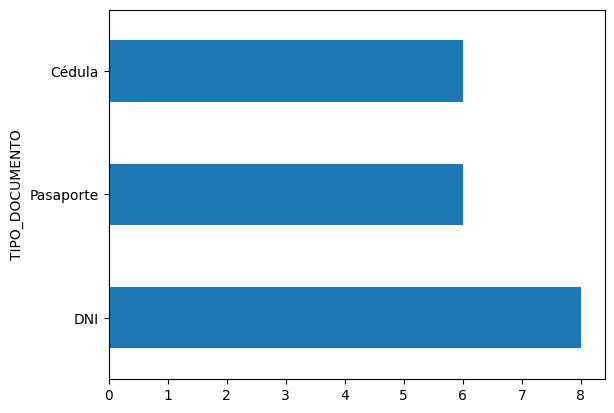

In [22]:
clientes_raw['TIPO_DOCUMENTO'].value_counts().plot(kind='barh')


<Axes: ylabel='CLASIFICACION'>

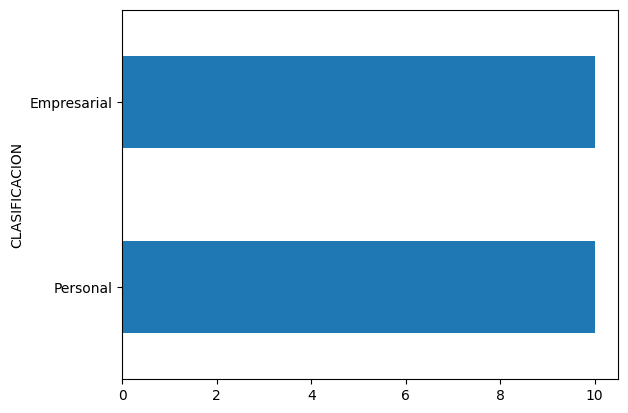

In [23]:
clientes_raw['CLASIFICACION'].value_counts().plot(kind='barh')

<Axes: ylabel='TIPO_TARJETA'>

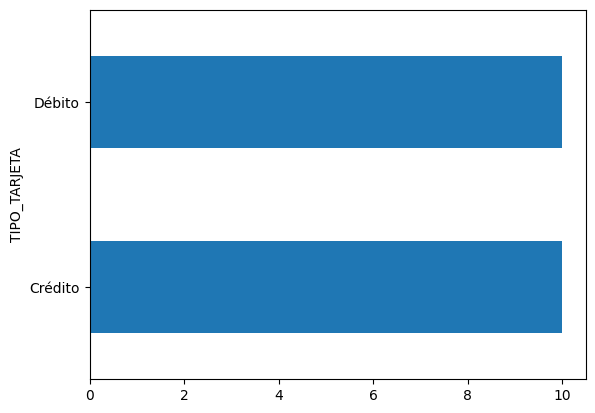

In [24]:
clientes_raw['TIPO_TARJETA'].value_counts().plot(kind='barh')

<Axes: ylabel='ESTADO_TARJETA'>

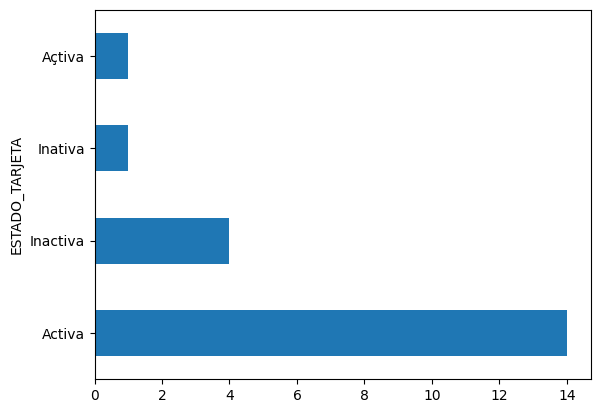

In [25]:
clientes_raw['ESTADO_TARJETA'].value_counts().plot(kind='barh')

en este caso se asume que los valores permitidos son Activa e Inactiva, los demas valores presentes se entiende que son problemas de calidad de datos por lo cual se reemplazaran con los valores aceptables

In [26]:
clientes_raw['ESTADO_TARJETA'] = clientes_raw['ESTADO_TARJETA'].replace({'Açtiva': 'Activa'})
clientes_raw['ESTADO_TARJETA'] = clientes_raw['ESTADO_TARJETA'].replace({'Inativa': 'Inactiva'})

<Axes: ylabel='ESTADO_TARJETA'>

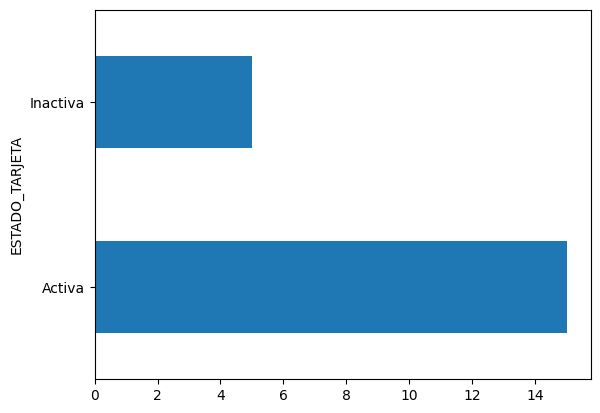

In [27]:
clientes_raw['ESTADO_TARJETA'].value_counts().plot(kind='barh')

In [28]:
clientes_raw['FECHA_APERTURA_TARJETA'].apply(type).value_counts()


FECHA_APERTURA_TARJETA
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    20
Name: count, dtype: int64

Creacion de dimensiones

In [29]:
df_tipo_documento = pd.DataFrame({
    "id": range(1, clientes_raw["TIPO_DOCUMENTO"].nunique() + 1),
    "tipo_documento": clientes_raw["TIPO_DOCUMENTO"].drop_duplicates().values
})

In [30]:
df_clasificacion = pd.DataFrame({
    "id": range(1, clientes_raw["CLASIFICACION"].nunique() + 1),
    "clasificacion": clientes_raw["CLASIFICACION"].drop_duplicates().values
})

In [31]:
df_tipo_tarjeta = pd.DataFrame({
    "id": range(1, clientes_raw["TIPO_TARJETA"].nunique() + 1),
    "tipo_tarjeta": clientes_raw["TIPO_TARJETA"].drop_duplicates().values
})

In [32]:
df_estado_tarjeta = pd.DataFrame({
    "id": range(1, clientes_raw["ESTADO_TARJETA"].nunique() + 1),
    "estado_tarjeta": clientes_raw["ESTADO_TARJETA"].drop_duplicates().values
})

Mapeo de id's de las dimensiones a la tabla clientes 

In [33]:
clientes = clientes_raw.copy()

clientes = clientes.merge(df_tipo_documento[["tipo_documento", "id"]], left_on="TIPO_DOCUMENTO", right_on="tipo_documento", how="left") \
                   .rename(columns={"id": "id_tipo_documento"}) \
                   .drop(columns=["tipo_documento","TIPO_DOCUMENTO"]) 

clientes = clientes.merge(df_clasificacion[["clasificacion", "id"]], left_on="CLASIFICACION", right_on="clasificacion", how="left") \
                   .rename(columns={"id": "id_clasificacion"}) \
                   .drop(columns=["clasificacion", "CLASIFICACION"]) 

clientes = clientes.merge(df_tipo_tarjeta[["tipo_tarjeta", "id"]], left_on="TIPO_TARJETA", right_on="tipo_tarjeta", how="left") \
                   .rename(columns={"id": "id_tipo_tarjeta"}) \
                   .drop(columns=["tipo_tarjeta", "TIPO_TARJETA"])  

clientes = clientes.merge(df_estado_tarjeta[["estado_tarjeta", "id"]], left_on="ESTADO_TARJETA", right_on="estado_tarjeta", how="left") \
                   .rename(columns={"id": "id_estado_tarjeta"}) \
                   .drop(columns=["estado_tarjeta", "ESTADO_TARJETA"])  


In [34]:
ruta_tiempo = ruta_base / 'Ejercicio2' / 'data' / 'raw' / 'Tiempo.xlsx'
tiempo = pd.read_excel(ruta_tiempo)

In [35]:
tiempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   fecha   138 non-null    datetime64[ns]
 1   id      139 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


In [36]:
clientes = clientes.merge(tiempo[["fecha", "id"]], left_on="FECHA_APERTURA_TARJETA", right_on="fecha", how="left") \
                   .rename(columns={"id": "id_fecha"}) \
                   .drop(columns=["fecha","FECHA_APERTURA_TARJETA"]) 

In [37]:
clientes.head()

,NOMBRE,IDENTIFICACIÓN,id_tipo_documento,id_clasificacion,id_tipo_tarjeta,id_estado_tarjeta,id_fecha
0,Juan Pérez,2C3D4E5F6G7H8I9J0,1,1,1,1,132
1,María García,2M3N4O5P6Q7R8S9T0,2,2,2,1,129
2,Carlos Rodríguez,2W3X4Y5Z6A7B8C9D0,1,1,1,2,118
3,Ana Martínez,2G3H4I5J6K7L8M9N0,3,2,2,1,112
4,Luis Hernández,2Q3R4S5T6U7V8W9X0,2,1,1,1,110


Guardar datos procesados como csv

In [ ]:
carpeta_destino = ruta_base / 'Ejercicio2' / 'data' / 'processed'

# clientes.to_csv(carpeta_destino / 'clientes.csv', index=False)
df_clasificacion.to_csv(carpeta_destino / 'clasificacion.csv', index=False)
df_estado_tarjeta.to_csv(carpeta_destino / 'estado_tarjeta.csv', index=False)
df_tipo_documento.to_csv(carpeta_destino / 'tipo_documento.csv', index=False)
df_tipo_tarjeta.to_csv(carpeta_destino / 'tipo_tarjeta.csv', index=False)





In [39]:
carpeta_destino_dup = ruta_base / 'Ejercicio2' / 'data' / 'interim'
duplicados.to_csv(carpeta_destino_dup / 'clientes_duplicados.csv', index=False)
